# The Michaelis-Menten Equation



> ## What is it?


Named after the German biochemist Leonor Michaelis and Canadian physician Maud Menten, the Michaelis-Menten equation is one of the best-known equations in enzyme biochemistry, and one of the field's fundamental equations.
 
The Michaelis-Menten equation describes the rate of product formation (forward rate of enzyme reaction,  $v$ = rate of change of product concentration, [P], over time) in relation to substrate concentration, [S] . The substrates are substances that are acted by the enzymes in a reaction.

The equation is shown below:

# $ v = \frac{d[P]}{dt}$ $ = \frac{V_{max} [S]}{K_{M} + [S]} $



where...
- $V_{max}$ is the **maximum rate of the system** (rate when all enzymes are saturated with substrates)

- $K_{M}$ is the **Michaelis Constant**, equal to the substrate concentration at which the system achieves a rate of $\frac{1}{2}$$V_{max}$. 

> ## Why is substrate concentration numerically equal to the Michaelis Constant at $\dfrac{1}{2}V_{max}$?  
  ## The Proof...




$$
v = \frac{d[P]}{dt} = \frac{V_{max} [S]}{K_{M} + [S]}
$$

When $v=\dfrac{1}{2}V_{max}$

$$
\begin{align*}
\dfrac{V_{max} [S]}{K_{M} + [S]} &= \dfrac{1}{2}V_{max}\\
\Rightarrow V_{max} [S] &= \dfrac{1}{2}V_{max}(K_{M} + [S])\\
\Rightarrow  [S] &= \dfrac{1}{2}(K_{M} + [S])\\
\Rightarrow  [S] &= K_{M}
\end{align*}
$$

---
The rate of the reaction in the system, $v$, reaches $\dfrac{1}{2}V_{max}$ when $[S]$ is equal to the $K_M$ of the enzyme!

Note: It is not possible to solve for $K_M$ from the equation alone. $K_M$ can be derived from the Michaelis-Menten curve.

### Setup Stuff

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

#Michaelis-Menten Equation function
def michaelis_menten(v_max, conc_subs, k_m):
  rate = (v_max * conc_subs)/(conc_subs + k_m)
  return rate

## What Does a Michaelis-Menten Curve Look Like?

[Description of what this is and the units of the model]
- doi:10.1016/j.toxlet.2012.12.012
- For verapamil, Km was 2.3 ± 0.5 M, Vmax 0.042 ± 0.001 pmolATP/g hPgp/min, and Vmax/Km 0.018 g/min mL. 

|               |          Verapamil           |
| :-----------: | :--------------------------: |
|   $V_{max}$   | 0.042 ± 0.001 ATP/g hPgp/min |
|     $K_m$     |         2.3 ± 0.5 M          |
| $V_{max}/K_m$ |        0.018 g/min mL        |



> ### Let's plot some graphs!

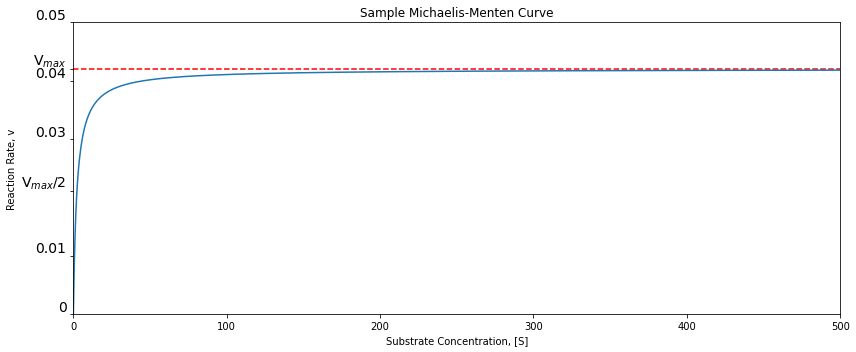

In [ ]:
velocity_list = list()
concentration_list = np.linspace(0, 500, 1000, endpoint = True)

v_max, k_m = 0.042, 2.3
velocity_list= michaelis_menten(v_max, concentration_list, k_m)  

plt.figure(figsize = (12,5))
plt.plot(concentration_list, velocity_list)
plt.xlabel('Substrate Concentration, [S]')
plt.ylabel('Reaction Rate, v')
plt.title('Sample Michaelis-Menten Curve')
plt.xlim(0,500)
plt.ylim(0,0.05)
plt.hlines(v_max, 0, 500, color = 'r',linestyle = 'dashed')
plt.yticks([0, 0.01, v_max/2, 0.03,0.04,v_max,0.05], [0, 0.01, 'V$_{max}$/2', 0.03,0.04,'V$_{max}$',0.05], fontsize=14, va='bottom')
# 'top', 'bottom', 'center', 'baseline', 'center_baseline'
plt.tight_layout()
plt.show()

As we can see from the graph above, the reaction rate begins at zero when there is no substrate present, and rises very quickly past a certain substrate concentration, plateauing at about 0.042. 

Let's zoom in to the range [S] when [S] lies between 0 - 20, and see if we can find out what $K_{M}$ should be. 

A conventional method of doing this is by drawing a vertical line downwards from the point on the curve corresponding to $\frac{1}{2}$$V_{max}$.

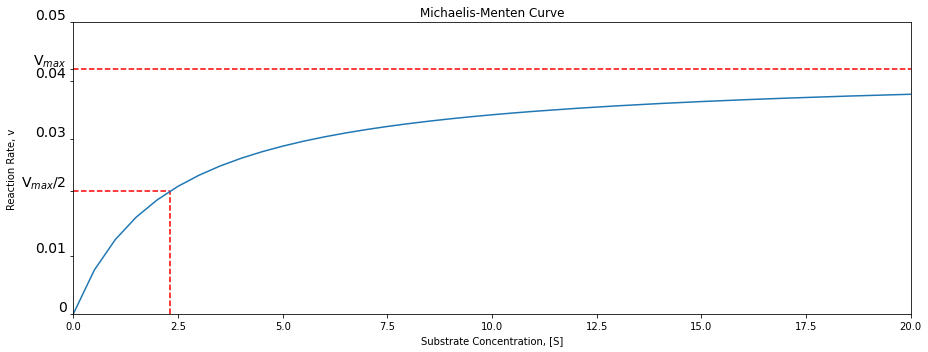

In [ ]:
velocity_list = list()
concentration_list = np.linspace(0, 500, 1000, endpoint = True)

v_max, k_m = 0.042, 2.3
velocity_list= michaelis_menten(v_max, concentration_list, k_m)  

plt.figure(figsize = (13,5))
plt.plot(concentration_list, velocity_list)
plt.xlabel('Substrate Concentration, [S]')
plt.ylabel('Reaction Rate, v')
plt.title('Michaelis-Menten Curve')
plt.xlim(0,20)
plt.ylim(0,0.05)
plt.hlines(v_max, 0, 20, color = 'r',linestyle = 'dashed')
plt.hlines(v_max/2, 0, 2.3, color = 'r',linestyle = 'dashed')        # Where did you get the value 2.3? Solved the equation for v= 1/2*v_max?
plt.vlines(2.3, 0, 0.021, color = 'r',linestyle = 'dashed')
plt.yticks([0, 0.01, v_max/2, 0.03,0.04,v_max,0.05], [0, 0.01, 'V$_{max}$/2', 0.03,0.04,'V$_{max}$',0.05], fontsize=14, va='bottom')

plt.tight_layout()
plt.show()

By drawing a line down from the point on the curve, one can estimate the value of $K_M$ for this system to be around 2.3 - 2.4. The $K_M$ for this particular system is indeed 2.3, so these would be pretty good estimates!



---



##That curve was generated **using** datapoints generated through the equation. How would $K_M$ be derived from an actual dataset? 

Fundamentally, it's the same process - plot the curve, find $V_{max}$, find $\frac{1}{2}$$V_{max}$, draw a downwards vertical line, and you get $K_M$. 

A central problem lies in finding the best-fit curve, because datasets in reality often deviate from the perfect Michaelis-Menten curve. (Another problem, of course, is making sure that you can actually get the right $K_M$ value just by drawing a downwards line).

Computing helps solve both of these problems - here, we can use **curve fitting** to produce the best-fit Michaelis-Menten curve. Using this curve, we will be able to estimate $K_M$ and $V_{max}$. Let's take a look using a sample dataset:

The value of Vmax is 73.26149999347464 and the value of Km is 3.437189729672601


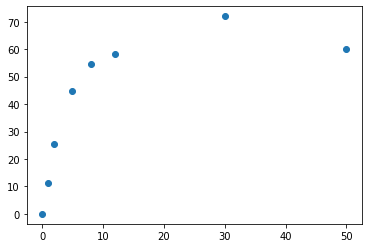

In [ ]:
import numpy as np
from scipy.optimize import curve_fit    
import matplotlib.pyplot as plt

x_values = [0,1,2,5,8,12,30,50]
y_values = [0,11.1,25.4,44.8,54.5,58.2,72,60.1]

def objective(x, v_max, k_m):
  rate = (v_max * x)/(x + k_m)
  return rate

popt, _ = curve_fit(objective, x_values, y_values)
v_max, k_m = popt
print(f'The value of Vmax is {v_max} and the value of Km is {k_m}')
plt.scatter(x_values,y_values)
plt.show()

Another test can be found below:

The value of Vmax is 0.005425232438021079 and the value of Km is 0.4398016151363371


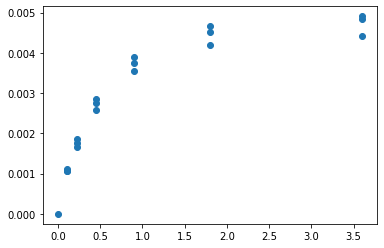

In [ ]:
data = np.array([[3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 3.6, 1.8, 0.9, 0.45, 0.225, 0.1125, 0],
                 [0.004407692, 0.004192308, 0.003553846, 0.002576923, 0.001661538, 0.001064286, 0.004835714, 0.004671429, 0.0039, 0.002857143, 0.00175, 0.001057143, 0.004907143, 0.004521429, 0.00375, 0.002764286, 0.001857143, 0.001121429, 0]]).T

s_real = data[:, 0]
v_real = data[:, 1]

popt, _ = curve_fit(objective, s_real, v_real)
v_max, k_m = popt
print(f'The value of Vmax is {v_max} and the value of Km is {k_m}')
plt.scatter(s_real,v_real)
plt.show()

## Importance and applications of $K_M$

> Indented block



The Michaelis Constant of an enzyme is crucial to know how much of an **_affinity_** an enzyme has for its substrate. '**_Affinity_**' refers to how strongly an enzyme recognises and binds to its corresponding substrate.

Just remember this... 

*   The lower the $K_M$, the higher the enzyme's affinity to the targeted substrate,
*   The lower the substrate concentration necessary to reach $V_{max}$.

Let us compare with some other enzymes with the same $V_{max}$ but double or triple the original enzyme's $K_M$.

 

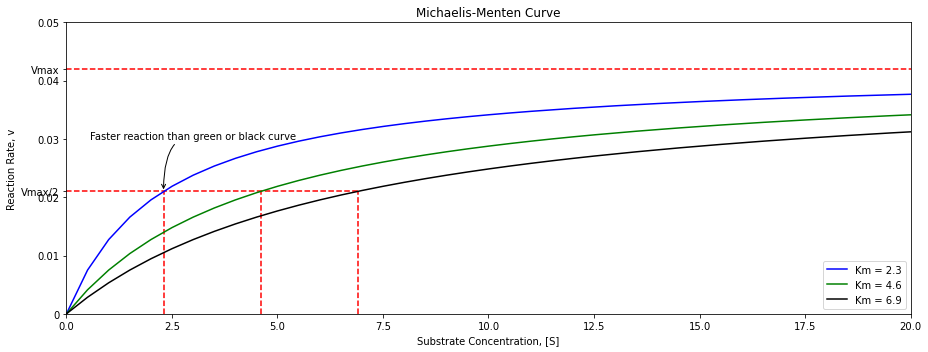

In [ ]:
concentration_list = np.linspace(0, 500, 1000, endpoint = True)
velocity_original_km = list()
velocity_double_km = list()
velocity_triple_km = list()

v_max, k_m = 0.042, 2.3
velocity_original_km = michaelis_menten(v_max, concentration_list, k_m)
velocity_double_km = michaelis_menten(v_max, concentration_list, 2 * k_m)
velocity_triple_km = michaelis_menten(v_max, concentration_list, 3 * k_m)

plt.figure(figsize = (13,5))
plt.plot(concentration_list, velocity_original_km, color = 'b',label = 'Km = 2.3')
plt.plot(concentration_list, velocity_double_km, color = 'g', label = 'Km = 4.6')
plt.plot(concentration_list, velocity_triple_km, color = 'black', label = 'Km = 6.9')
plt.xlabel('Substrate Concentration, [S]')
plt.ylabel('Reaction Rate, v')
plt.title('Michaelis-Menten Curve')
plt.xlim(0,20)
plt.ylim(0,0.05)
plt.hlines(v_max, 0, 20, color = 'r',linestyle = 'dashed')
plt.hlines(v_max/2, 0, 6.9, color = 'r',linestyle = 'dashed')
plt.vlines(k_m, 0, v_max/2, color = 'r',linestyle = 'dashed')
plt.vlines(2 * k_m, 0, v_max/2, color = 'r',linestyle = 'dashed')
plt.vlines(3 * k_m, 0, v_max/2, color = 'r',linestyle = 'dashed')
plt.yticks([0, 0.01, 0.02,v_max/2, 0.03,0.04,0.042,0.05], [0, 0.01, 0.02,'Vmax/2', 0.03,0.04,'Vmax',0.05])

ax=plt.gca()
ax.annotate('Faster reaction than green or black curve', xy=(k_m, v_max/2), xytext=(3, .03), horizontalalignment='center',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

plt.tight_layout()
plt.legend(loc = 'lower right')
plt.show()

As can be seen, using the enzyme with a lower $K_M$ (indicating a lower affinity for the substrate) means that a far higher concentration of substrate is required to reach $V_{max}$.

Knowing the $K_M$ of an enzyme is important to understand how your enzymes work and how drugs manipulate those reactions.

## Now let us imagine a scenario...

You are a pharmaceutical scientist working on R&D for a new drug. 

Aside from understanding the drug's interactions with the body's enzymes, you will also need to know about $EC_{50}$ and $IC_{50}$ values.

Let's take a look at some examples of drugs...

Data from https://www-proquest-com.libproxy1.nus.edu.sg/publiccontent/docview/2583047989?pq-origsite=summon





> # $EC_{50}$ 

The $EC_{50}$ value is a measure of how potent a substance is in *generating the intended response*. More specifically, it is the concentration of drug required to achieve a response halfway between its baseline and the maximal effect.



> For graded dose response curves, the $EC_{50}$ is the concentration where 50% of the maximal effect can be observed.

**DO NOTE**: $EC_{50}$ curves could be plotted all kinds of drugs, be it **inducing** _OR_ **inhibiting** a response. 
 
We can tweak our Michaelis-Menten Equation to look like this:

# $ v = \frac{V_{max} [drug]}{EC_{50} + [drug]} $

- where $[drug]$ refers to the drug's concentration (x-axis) 
- and $v$ refers to the drug's effect (y-axis)

> A low $EC_{50}$ value for a drug means that the drug is potent, and that less of it is required to achieve the desired response!




##Let's graph out the $EC_{50}$ curves for drug 

---

that are enzyme **inducers**...

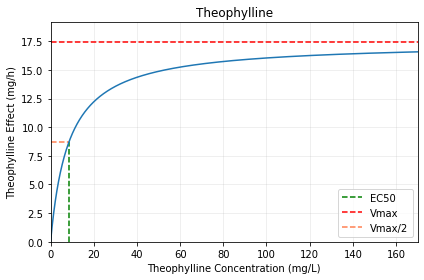

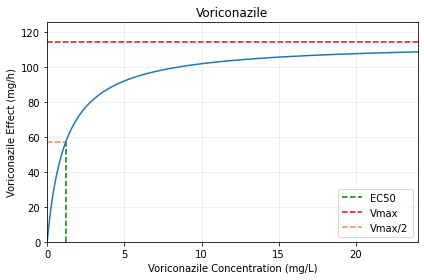

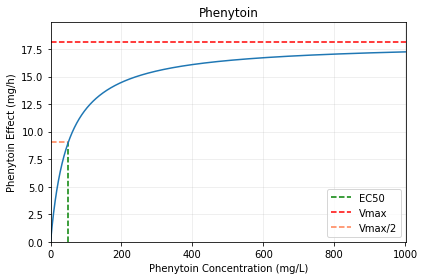

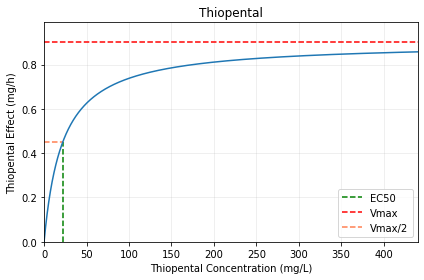

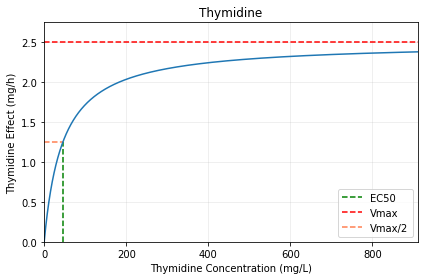

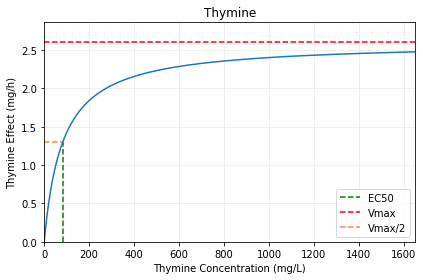

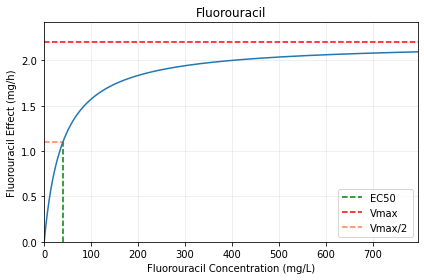

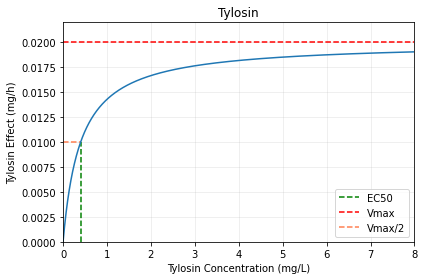

In [ ]:
# INDIVIDUAL PLTOS WITH SUITABLE X AND Y LIMITS FOR ALL

inducer_list = ['Theophylline', 'Voriconazile', 'Phenytoin', 'Thiopental', 'Thymidine', 'Thymine', 'Fluorouracil', 'Tylosin']
Vmax = [17.4, 114, 18.1, 0.9, 2.5, 2.6, 2.2, 0.02]
EC_50 = [8.5, 1.2, 50.2, 22, 45.5, 82.5, 39.8, 0.4] 
drug_conc = np.linspace(0, 2500, 1000000, endpoint = True)

def inD_rate(drug_conc, EC_50, Vmax):
    return Vmax * drug_conc / (EC_50 + drug_conc)

for i, inducer in enumerate(inducer_list):
  
  plt.plot(drug_conc, inD_rate(drug_conc, EC_50[i], Vmax[i]))
  plt.grid(alpha=0.25)

  plt.xlim(0, 20*EC_50[i])
  plt.vlines(EC_50[i], 0, Vmax[i]/2, color = 'g',linestyle = 'dashed', label = 'EC50')
  plt.xlabel(f'{inducer} Concentration (mg/L)')

  plt.ylim(0, 11*Vmax[i]/10)
  plt.hlines(Vmax[i], 0, 2500, color = 'r', linestyle = 'dashed', label = 'Vmax')
  plt.hlines(Vmax[i]/2, 0, EC_50[i], color = 'coral',linestyle = 'dashed', label = 'Vmax/2')
  plt.ylabel(f'{inducer} Effect (mg/h)')

  plt.legend(loc='lower right')
  plt.title(f'{inducer}')
  plt.tight_layout()
  plt.show()

> ###And now for comparison between inducer drugs...

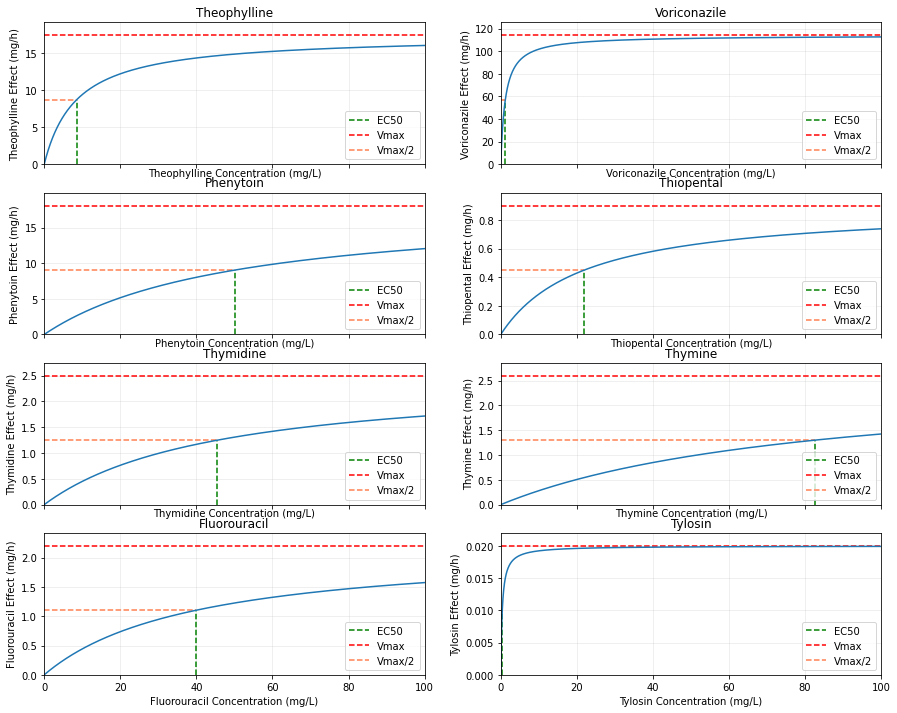

In [ ]:
# SAME THING BUT IN A GRID FORMAT TO COMPARE BETWEEN INDUCER DRUGS

inducer_list = ['Theophylline', 'Voriconazile', 'Phenytoin', 'Thiopental', 'Thymidine', 'Thymine', 'Fluorouracil', 'Tylosin']
Vmax = [17.4, 114, 18.1, 0.9, 2.5, 2.6, 2.2, 0.02]
EC_50 = [8.5, 1.2, 50.2, 22, 45.5, 82.5, 39.8, 0.4] 

drug_conc = np.linspace(0, 2500, 1000000, endpoint = True)

def inD_rate(drug_conc, EC_50, Vmax):
    return Vmax * drug_conc / (EC_50 + drug_conc)

fig, ax = plt.subplots(nrows=4, ncols=2,
                       figsize=(15, 12), sharex=True)

all_axes = ax.flatten()

for i, inducer in enumerate(inducer_list):
    all_axes[i].plot(drug_conc, inD_rate(drug_conc, EC_50[i], Vmax[i]))

    all_axes[i].set_xlim(0, 100)
    all_axes[i].vlines(EC_50[i], 0, Vmax[i]/2, color = 'g',linestyle = 'dashed', label = 'EC50')
    all_axes[i].set_xlabel(f'{inducer} Concentration (mg/L)')

    all_axes[i].set_ylim(0, 11*Vmax[i]/10)
    all_axes[i].hlines(Vmax[i], 0, 2500, color = 'r', linestyle = 'dashed', label = 'Vmax')
    all_axes[i].hlines(Vmax[i]/2, 0, EC_50[i], color = 'coral',linestyle = 'dashed', label = 'Vmax/2')
    all_axes[i].set_ylabel(f'{inducer} Effect (mg/h)')

    all_axes[i].legend(loc='lower right')
    all_axes[i].set_title(inducer)
    all_axes[i].grid(alpha=0.25)

##And now, for enzyme **inhibitors**...

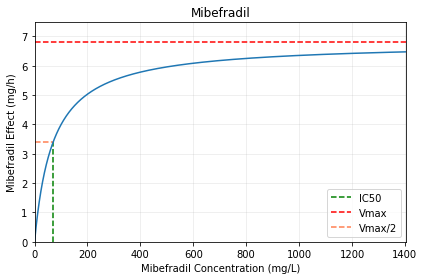

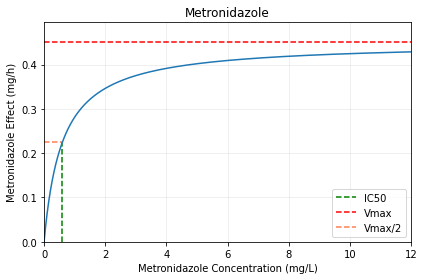

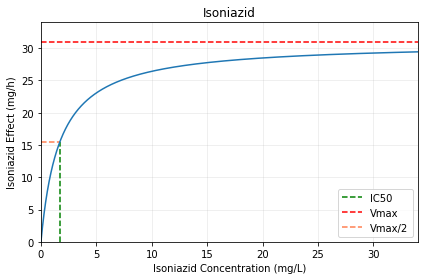

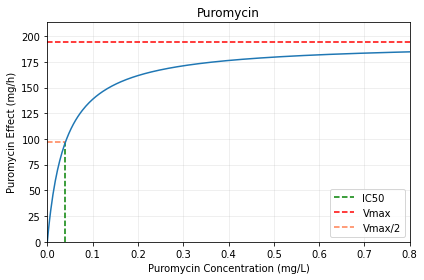

In [ ]:
# INDIVIDUAL PLTOS WITH SUITABLE X AND Y LIMITS FOR ALL

inhibitor_list = ['Mibefradil', 'Metronidazole', 'Isoniazid', 'Puromycin']
Vmax = [6.8, 0.45, 30.9, 193.9]
IC_50 = [70.2, 0.6, 1.7, 0.04] 
drug_conc = np.linspace(0, 2500, 1000000, endpoint = True)

def inH_rate(drug_conc, EC_50, Vmax):
    return Vmax * drug_conc / (EC_50 + drug_conc)

for i, inhibitor in enumerate(inhibitor_list):
  
  plt.plot(drug_conc, inH_rate(drug_conc, IC_50[i], Vmax[i]))
  plt.grid(alpha=0.25)

  plt.xlim(0, 20*IC_50[i])
  plt.vlines(IC_50[i], 0, Vmax[i]/2, color = 'g',linestyle = 'dashed', label = 'IC50')
  plt.xlabel(f'{inhibitor} Concentration (mg/L)')

  plt.ylim(0, 11*Vmax[i]/10)
  plt.hlines(Vmax[i], 0, 2500, color = 'r', linestyle = 'dashed', label = 'Vmax')
  plt.hlines(Vmax[i]/2, 0, IC_50[i], color = 'coral',linestyle = 'dashed', label = 'Vmax/2')
  plt.ylabel(f'{inhibitor} Effect (mg/h)')

  plt.legend(loc='lower right')
  plt.title(f'{inhibitor}')
  plt.tight_layout()
  plt.show()

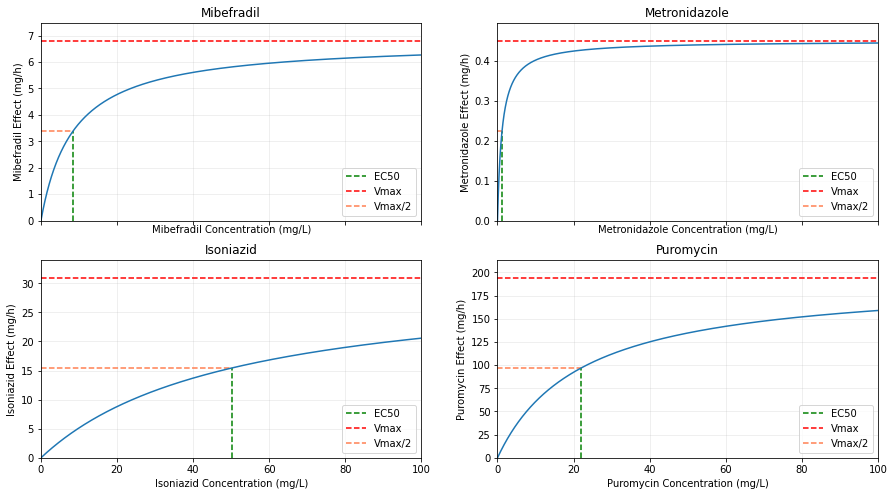

In [ ]:
# SAME THING BUT IN A GRID FORMAT TO COMPARE BETWEEN INHIBITOR DRUGS

inhibitor_list = ['Mibefradil', 'Metronidazole', 'Isoniazid', 'Puromycin']
Vmax = [6.8, 0.45, 30.9, 193.9]
IC_50 = [70.2, 0.6, 1.7, 0.04] 

drug_conc = np.linspace(0, 2500, 1000000, endpoint = True)

def inH_rate(drug_conc, EC_50, Vmax):
    return Vmax * drug_conc / (EC_50 + drug_conc)

fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(15, 8), sharex=True)

all_axes = ax.flatten()

for i, inhibitor in enumerate(inhibitor_list):
    all_axes[i].plot(drug_conc, inD_rate(drug_conc, EC_50[i], Vmax[i]))

    all_axes[i].set_xlim(0, 100)
    all_axes[i].vlines(EC_50[i], 0, Vmax[i]/2, color = 'g',linestyle = 'dashed', label = 'EC50')
    all_axes[i].set_xlabel(f'{inhibitor} Concentration (mg/L)')

    all_axes[i].set_ylim(0, 11*Vmax[i]/10)
    all_axes[i].hlines(Vmax[i], 0, 2500, color = 'r', linestyle = 'dashed', label = 'Vmax')
    all_axes[i].hlines(Vmax[i]/2, 0, EC_50[i], color = 'coral',linestyle = 'dashed', label = 'Vmax/2')
    all_axes[i].set_ylabel(f'{inhibitor} Effect (mg/h)')

    all_axes[i].legend(loc='lower right')
    all_axes[i].set_title(inhibitor)
    all_axes[i].grid(alpha=0.25)

###From the above graphs, we determine that Tylosin (for inducers) and Metronidazole (for inhibitors) have the smallest $K_M$. Does it mean they are the best drugs?

###Well, it is also equally important to compare their respective limiting effects. Despite a low $K_M$, notice that they have also really small effects.

# **Not just about drugs...**

Since enzymes exist outside our bodies, we can also apply Michaelis-Menten Equations to monitor reactions or changes that occur outside our bodies. 

## **Let's see how the Michaelis-Menten equation is applied in food fermentation**

Reference: Khushairi, Z. A.; Samad, K. A.; Rahman, N. A. A.; Yussof, H. W.; Zainol, N. Application of Michaelis–Menten in the Kinetics of Oil Palm Frond Enzymatic Hydrolysis for Ferulic Acid Production. *SN Appl. Sci.* 2020, 2 (2), 254. https://doi.org/10.1007/s42452-020-2062-3.

https://link-springer-com.libproxy1.nus.edu.sg/article/10.1007/s42452-020-2062-3 

Khushairi et al. 2020 conducted a study to investigate the enzymatic activity of ferulic acid esterase (FAE), an enzyme that specifically catalyses chemical reactions for ferulic acid (FA) production. 

Ferulic acid is a phenolic acid that is reported to contain health benefits such as anti-oxidative and anti-inflammatory properties, hence they are highly value-added compounds used in consumer products.

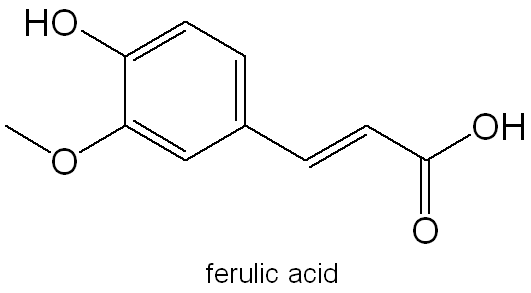

Using the Michaelis-Menten equation to study the kinetics of FA production by FAE in a mixed culture fermentation (fermentation involving two or more microorganisms) where oil palm frond bagasse (OPFB) was the substrate used in the fermentation process.

The following kinetic constants were obtained, where the model is determined by the Runge-Kutta Fourth Order Approach. Before this, we need to figure out how we can obtain these kinetic constants:

* $V_{max}$ = 3.725 x 10-3 g L-1 h-1
* $K_{m}$ = 28.231 g L-1
* [S] = 1.33 x 10-2 h-1 



### ***Can Python be used to estimate the kinetic parameters***

In this scenario, we will show a limitation of the Michaelis-Menten equation. The Km and Vmax cannot be directly estimated using the Michaelis-Menten plot.

---

*So, what is the solution?*

----

The **Lineweaver-Burk plot**, a simplified linear form of the Michaelis-Menten equation can be used to directly estimate the Km and Vmax values. This is because the Lineweaver-Burk Plot is a **double-reciprocal** as 1/$v_{o}$ are plotted against 1/[S].

The equation for the Lineweaver-Burk Plot is shown below:

# $ \frac{1}{v_{o}} = \frac{K_{max}}{V_{max}} \frac{1}{[S]} + \frac{1}{V_{max}} $

The following Lineweaver-Burk plot below represents the plot that is replicated from the paper.

In [ ]:
import numpy as np 
import sympy as sp 
import matplotlib.pyplot as plt 

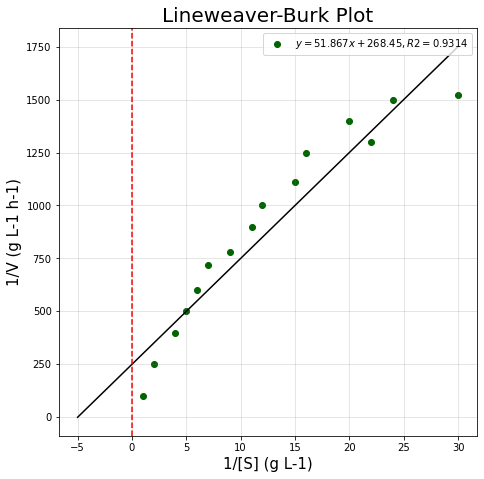

In [ ]:
x_1 = [1, 2, 4, 5, 6, 7, 9, 11, 12, 15, 16, 20, 22, 24, 30]
y_1 = [100, 250, 400, 500, 600, 720, 780, 900, 1000, 1110, 1250, 1400, 1300, 1500, 1520]
x_2 = [-5, 0, 5, 15, 25, 30]
y_2 = [0, 250, 500, 1000, 1500, 1750]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))
ax.plot(x_2, y_2, color='black')
ax.scatter(x_1, y_1, label="$y = 51.867x + 268.45, R2 = 0.9314$", color='darkgreen')

ax.set_xlabel('1/[S] (g L-1)', size=15)
ax.set_ylabel('1/V (g L-1 h-1)', size=15)
ax.set_title('Lineweaver-Burk Plot', size=20)
ax.grid(alpha=.25, color='gray')
ax.legend(loc='upper right')
plt.axvline(x = 0, linestyle = '--', color = 'r')

plt.savefig('simple-plot.png', dpi=150)
plt.show()

Using the Lineweaver-Burk plot, the Km and Vmax values can be estimated using the black trend line as shown:

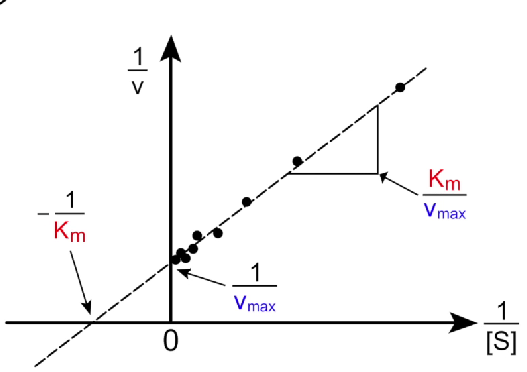

From the Lineweaver-Burk plot that is provided in the paper, the authors obtained the $V_{max}$ and $K_{m}$ values as 0.004 g L-1 h-1 and 0.193 g L-1 respectively. 

---

The use of the Lineweaver-Burk plot complements the Michaelis-Menten equation. How does it do so?

---

The obtained $V_{max}$ and $K_{m}$ values from the Lineweaver-Burk Plot are used as estimates in the Runge-Kutta Fourth Order Approach method. The method also invovles modifying the Michaelis-Menten equation where the actual $K_{m}$, $V_{max}$ and [S] values are obtained. The equation is shown below:

# $ \frac{dP}{dt} = \frac{V_{max} [S]}{(K_{m} + [S])} $

### ***Why does the $K_{m}$, $V_{max}$ and [S] matter so much in this kind of fermentation?***

The $K_{m}$, $V_{max}$ and [S] values impact the FA production as it affects the concentration and activity of FAE enzyme and the OPFB substrate used in the reaction. In this study, the Ks value of 1.33 x 10-2 h-1 is much higher compared to similar studies that uses different substrates. 

A higher [S] value indicates that more OPFB is available for the microorganisms to access, hence releasing FAE enzymes to act on the substrate. The value of [S] is influenced by several factors such as the nature of the OPFB substrate (e.g. lignin content) or the type of mixed cultures used in the fermentation process.

Based on Michaelis-Menten equation, [S] significantly influences both $K_{m}$ and $V_{max}$ of the fermentation reaction. 

* A high $V_{max}$ value is preferred as the rate of the FAE enzymatic reaction is high, hence FA yields will increase. 

* A low $K_{m}$ value is preferred as it indicates a high enzyme affinity to the substrate, which requires less [S] to achieve half of the $V_{max}$ value. In other words, a low $K_{m}$ value requires less [S] to enhance FA production rate.

**Therefore, this scenario shows how we can use Python to model the Lineweaver-Burk plot and apply the Michaelis-Menten equation to understand the enzyme kinetics in the food industry**